In [2]:
#IMPORTS
import pandas as pd
import h5py
import numpy as np
import sys
import matplotlib.pyplot as plt
import neurokit2 as nk
import random


In [3]:


#CARREGAR OS DADOS
def carregar_ecgs(normal,umdavb,rbbb,lbbb,sb,st,af,filtrado):
    caminho_arquivo = "../Projeto/Database/exams.csv"
    dados = pd.read_csv(caminho_arquivo)
    arquivos_usados = ["exams_part0.hdf5", "exams_part1.hdf5",
                    "exams_part2.hdf5", "exams_part3.hdf5", "exams_par4.hdf5", "exams_part5.hdf5",
                    "exams_part6.hdf5", "exams_part7.hdf5", "exams_par8.hdf5", "exams_part9.hdf5",
                    "exams_part10.hdf5", "exams_part11.hdf5", "exams_part12.hdf5", "exams_part13.hdf5", 
                    "exams_part14.hdf5", "exams_part15.hdf5", "exams_part16.hdf5", "exams_part17.hdf5"]

    ecg_normal_linhas = dados.index[(dados.iloc[:, 14].isin(arquivos_usados)) &
                                    (dados.iloc[:, 4] == False) &
                                    (dados.iloc[:, 5] == False) &
                                    (dados.iloc[:, 6] == False) &
                                    (dados.iloc[:, 7] == False) &
                                    (dados.iloc[:, 8] == False) &
                                    (dados.iloc[:, 9] == False) &
                                    (dados.iloc[:, 13] == True)]
    
    ecg_umdavb_linhas = dados.index[(dados.iloc[:, 14].isin(arquivos_usados)) &
                                    (dados.iloc[:, 4] == True) &
                                    (dados.iloc[:, 5] == False) &
                                    (dados.iloc[:, 6] == False) &
                                    (dados.iloc[:, 7] == False) &
                                    (dados.iloc[:, 8] == False) &
                                    (dados.iloc[:, 9] == False) &
                                    (dados.iloc[:, 13] == False)]
    
    ecg_rbbb_linhas = dados.index[(dados.iloc[:, 14].isin(arquivos_usados)) &
                                    (dados.iloc[:, 4] == False) &
                                    (dados.iloc[:, 5] == True) &
                                    (dados.iloc[:, 6] == False) &
                                    (dados.iloc[:, 7] == False) &
                                    (dados.iloc[:, 8] == False) &
                                    (dados.iloc[:, 9] == False) &
                                    (dados.iloc[:, 13] == False)]
    
    ecg_lbbb_linhas = dados.index[(dados.iloc[:, 14].isin(arquivos_usados)) &
                                    (dados.iloc[:, 4] == False) &
                                    (dados.iloc[:, 5] == False) &
                                    (dados.iloc[:, 6] == True) &
                                    (dados.iloc[:, 7] == False) &
                                    (dados.iloc[:, 8] == False) &
                                    (dados.iloc[:, 9] == False) &
                                    (dados.iloc[:, 13] == False)]
    
    ecg_sb_linhas = dados.index[(dados.iloc[:, 14].isin(arquivos_usados)) &
                                    (dados.iloc[:, 4] == False) &
                                    (dados.iloc[:, 5] == False) &
                                    (dados.iloc[:, 6] == False) &
                                    (dados.iloc[:, 7] == True) &
                                    (dados.iloc[:, 8] == False) &
                                    (dados.iloc[:, 9] == False) &
                                    (dados.iloc[:, 13] == False)]
    
    ecg_st_linhas = dados.index[(dados.iloc[:, 14].isin(arquivos_usados)) &
                                    (dados.iloc[:, 4] == False) &
                                    (dados.iloc[:, 5] == False) &
                                    (dados.iloc[:, 6] == False) &
                                    (dados.iloc[:, 7] == False) &
                                    (dados.iloc[:, 8] == True) &
                                    (dados.iloc[:, 9] == False) &
                                    (dados.iloc[:, 13] == False)]
    
    ecg_af_linhas = dados.index[(dados.iloc[:, 14].isin(arquivos_usados)) &
                                    (dados.iloc[:, 4] == False) &
                                    (dados.iloc[:, 5] == False) &
                                    (dados.iloc[:, 6] == False) &
                                    (dados.iloc[:, 7] == False) &
                                    (dados.iloc[:, 8] == False) &
                                    (dados.iloc[:, 9] == True) &
                                    (dados.iloc[:, 13] == False)]



    print("Número de linhas ecg_normal_linhas:", len(ecg_normal_linhas))
    print("Número de linhas ecg_umdavb_linhas:", len(ecg_umdavb_linhas))
    print("Número de linhas ecg_rbbb_linhas:", len(ecg_rbbb_linhas))
    print("Número de linhas ecg_lbbb_linhas:", len(ecg_lbbb_linhas))
    print("Número de linhas ecg_sb_linhas:", len(ecg_sb_linhas))
    print("Número de linhas ecg_st_linhas:", len(ecg_st_linhas))
    print("Número de linhas ecg_af_linhas:", len(ecg_af_linhas))

    caminho_interferencias = "../Projeto/Database/resultados_interferencia.csv"
    interferencias = pd.read_csv(caminho_interferencias)
    interferencias_ids = interferencias['exam_id'].tolist()

    ecg_normal_linhas = dados.index[~dados['exam_id'].isin(interferencias_ids) &
                                    (dados.iloc[:, 14].isin(arquivos_usados)) &
                                    (dados.iloc[:, 4] == False) &
                                    (dados.iloc[:, 5] == False) &
                                    (dados.iloc[:, 6] == False) &
                                    (dados.iloc[:, 7] == False) &
                                    (dados.iloc[:, 8] == False) &
                                    (dados.iloc[:, 9] == False) &
                                    (dados.iloc[:, 13] == True)]
    
    ecg_umdavb_linhas = dados.index[~dados['exam_id'].isin(interferencias_ids) &
                                    (dados.iloc[:, 14].isin(arquivos_usados)) &
                                    (dados.iloc[:, 4] == True) &
                                    (dados.iloc[:, 5] == False) &
                                    (dados.iloc[:, 6] == False) &
                                    (dados.iloc[:, 7] == False) &
                                    (dados.iloc[:, 8] == False) &
                                    (dados.iloc[:, 9] == False) &
                                    (dados.iloc[:, 13] == False)]
    
    ecg_rbbb_linhas = dados.index[~dados['exam_id'].isin(interferencias_ids) &
                                    (dados.iloc[:, 14].isin(arquivos_usados)) &
                                    (dados.iloc[:, 4] == False) &
                                    (dados.iloc[:, 5] == True) &
                                    (dados.iloc[:, 6] == False) &
                                    (dados.iloc[:, 7] == False) &
                                    (dados.iloc[:, 8] == False) &
                                    (dados.iloc[:, 9] == False) &
                                    (dados.iloc[:, 13] == False)]
    
    ecg_lbbb_linhas = dados.index[~dados['exam_id'].isin(interferencias_ids) &
                                    (dados.iloc[:, 14].isin(arquivos_usados)) &
                                    (dados.iloc[:, 4] == False) &
                                    (dados.iloc[:, 5] == False) &
                                    (dados.iloc[:, 6] == True) &
                                    (dados.iloc[:, 7] == False) &
                                    (dados.iloc[:, 8] == False) &
                                    (dados.iloc[:, 9] == False) &
                                    (dados.iloc[:, 13] == False)]
    
    ecg_sb_linhas = dados.index[~dados['exam_id'].isin(interferencias_ids) &
                                    (dados.iloc[:, 14].isin(arquivos_usados)) &
                                    (dados.iloc[:, 4] == False) &
                                    (dados.iloc[:, 5] == False) &
                                    (dados.iloc[:, 6] == False) &
                                    (dados.iloc[:, 7] == True) &
                                    (dados.iloc[:, 8] == False) &
                                    (dados.iloc[:, 9] == False) &
                                    (dados.iloc[:, 13] == False)]
    
    ecg_st_linhas = dados.index[~dados['exam_id'].isin(interferencias_ids) &
                                    (dados.iloc[:, 14].isin(arquivos_usados)) &
                                    (dados.iloc[:, 4] == False) &
                                    (dados.iloc[:, 5] == False) &
                                    (dados.iloc[:, 6] == False) &
                                    (dados.iloc[:, 7] == False) &
                                    (dados.iloc[:, 8] == True) &
                                    (dados.iloc[:, 9] == False) &
                                    (dados.iloc[:, 13] == False)]
    
    ecg_af_linhas = dados.index[~dados['exam_id'].isin(interferencias_ids) &
                                    (dados.iloc[:, 14].isin(arquivos_usados)) &
                                    (dados.iloc[:, 4] == False) &
                                    (dados.iloc[:, 5] == False) &
                                    (dados.iloc[:, 6] == False) &
                                    (dados.iloc[:, 7] == False) &
                                    (dados.iloc[:, 8] == False) &
                                    (dados.iloc[:, 9] == True) &
                                    (dados.iloc[:, 13] == False)]

    print("Tirando Interferência:")
    print("Número de linhas ecg_normal_linhas:", len(ecg_normal_linhas))
    print("Número de linhas ecg_umdavb_linhas:", len(ecg_umdavb_linhas))
    print("Número de linhas ecg_rbbb_linhas:", len(ecg_rbbb_linhas))
    print("Número de linhas ecg_lbbb_linhas:", len(ecg_lbbb_linhas))
    print("Número de linhas ecg_sb_linhas:", len(ecg_sb_linhas))
    print("Número de linhas ecg_st_linhas:", len(ecg_st_linhas))
    print("Número de linhas ecg_af_linhas:", len(ecg_af_linhas))

    ecg_normal_id = dados.iloc[ecg_normal_linhas, 0].tolist()
    ecg_umdavb_id = dados.iloc[ecg_umdavb_linhas, 0].tolist()
    ecg_rbbb_id = dados.iloc[ecg_rbbb_linhas, 0].tolist()
    ecg_lbbb_id = dados.iloc[ecg_lbbb_linhas, 0].tolist()
    ecg_sb_id = dados.iloc[ecg_sb_linhas, 0].tolist()
    ecg_st_id = dados.iloc[ecg_st_linhas, 0].tolist()
    ecg_af_id = dados.iloc[ecg_af_linhas, 0].tolist()

    random.seed(42) 

    ecg_normal_sample = random.sample(ecg_normal_id, normal) if len(ecg_normal_id) >= normal else ecg_normal_id
    ecg_umdavb_sample = random.sample(ecg_umdavb_id, umdavb) if len(ecg_umdavb_id) >= umdavb else ecg_umdavb_id
    ecg_rbbb_sample = random.sample(ecg_rbbb_id, rbbb) if len(ecg_rbbb_id) >= rbbb else ecg_rbbb_id
    ecg_lbbb_sample = random.sample(ecg_lbbb_id, lbbb) if len(ecg_lbbb_id) >= lbbb else ecg_lbbb_id
    ecg_sb_sample = random.sample(ecg_sb_id, sb) if len(ecg_sb_id) >= sb else ecg_sb_id
    ecg_st_sample = random.sample(ecg_st_id, st) if len(ecg_st_id) >= st else ecg_st_id
    ecg_af_sample = random.sample(ecg_af_id, af) if len(ecg_af_id) >= af else ecg_af_id

    ids_ecgs = ecg_normal_sample + ecg_umdavb_sample + ecg_rbbb_sample + ecg_lbbb_sample + ecg_sb_sample + ecg_st_sample + ecg_af_sample

    print("Número de ecgs pra usar:", len(ids_ecgs))

    
    if filtrado == True: arquivos_hdf5 = ["/scratch/guilherme.evangelista/Clustering-Paper/Projeto/Database/filtered_exams_0_1.hdf5",
                        "/scratch/guilherme.evangelista/Clustering-Paper/Projeto/Database/filtered_exams_2_3.hdf5",
                        "/scratch/guilherme.evangelista/Clustering-Paper/Projeto/Database/filtered_exams_4_5.hdf5",
                        "/scratch/guilherme.evangelista/Clustering-Paper/Projeto/Database/filtered_exams_6_7.hdf5",
                        "/scratch/guilherme.evangelista/Clustering-Paper/Projeto/Database/filtered_exams_8_9.hdf5",
                        "/scratch/guilherme.evangelista/Clustering-Paper/Projeto/Database/filtered_exams_10_11.hdf5",
                        "/scratch/guilherme.evangelista/Clustering-Paper/Projeto/Database/filtered_exams_12_13.hdf5",
                        "/scratch/guilherme.evangelista/Clustering-Paper/Projeto/Database/filtered_exams_14_15.hdf5",
                        "/scratch/guilherme.evangelista/Clustering-Paper/Projeto/Database/filtered_exams_16_17.hdf5"]
    
    else: arquivos_hdf5 = ['/scratch/pedro.bacelar/Clustering-Paper/Projeto/Database/exams_part0.hdf5',
                 '/scratch/pedro.bacelar/Clustering-Paper/Projeto/Database/exams_part1.hdf5',
                 '/scratch/pedro.bacelar/Clustering-Paper/Projeto/Database/exams_part2.hdf5',
                 '/scratch/pedro.bacelar/Clustering-Paper/Projeto/Database/exams_part3.hdf5',
                 '/scratch/pedro.bacelar/Clustering-Paper/Projeto/Database/exams_part4.hdf5',
                 '/scratch/pedro.bacelar/Clustering-Paper/Projeto/Database/exams_part5.hdf5',
                 '/scratch/pedro.bacelar/Clustering-Paper/Projeto/Database/exams_part6.hdf5',
                 '/scratch/pedro.bacelar/Clustering-Paper/Projeto/Database/exams_part7.hdf5',
                 '/scratch/pedro.bacelar/Clustering-Paper/Projeto/Database/exams_part8.hdf5',
                 '/scratch/pedro.bacelar/Clustering-Paper/Projeto/Database/exams_part9.hdf5',
                 '/scratch/pedro.bacelar/Clustering-Paper/Projeto/Database/exams_part10.hdf5',
                 '/scratch/pedro.bacelar/Clustering-Paper/Projeto/Database/exams_part11.hdf5',
                 '/scratch/pedro.bacelar/Clustering-Paper/Projeto/Database/exams_part12.hdf5',
                 '/scratch/pedro.bacelar/Clustering-Paper/Projeto/Database/exams_part13.hdf5',
                 '/scratch/pedro.bacelar/Clustering-Paper/Projeto/Database/exams_part14.hdf5',
                 '/scratch/pedro.bacelar/Clustering-Paper/Projeto/Database/exams_part15.hdf5',
                 '/scratch/pedro.bacelar/Clustering-Paper/Projeto/Database/exams_part16.hdf5',
                 '/scratch/pedro.bacelar/Clustering-Paper/Projeto/Database/exams_part17.hdf5']
        
    

    def get_ecg_data(file_path, exam_id):
        with h5py.File(file_path, 'r') as f:
            # Obter os IDs dos exames
            exam_ids = np.array(f['exam_id'])

            # Encontrar o índice correspondente ao exam_id de interesse
            exam_index = np.where(exam_ids == exam_id)[0]

            if len(exam_index) == 0:
                raise ValueError("Exam ID não encontrado.")
            else:
                exam_index = exam_index[0]
                # Acessar os tracings de ECG correspondentes ao exam_index
                exam_tracings = f['tracings'][exam_index]
                # Preencher tracings nulos com epsilon
                return exam_tracings

    exam_ids_to_cluster = ids_ecgs  # Substitua pelos IDs reais dos exames

    # Lista para armazenar todos os tracings de ECG
    all_tracings = []

    # Obter os tracings de ECG para cada exam_id e armazenar na lista
    for exam_id in exam_ids_to_cluster:
        found = False  # Sinalizador para verificar se o exame foi encontrado em algum arquivo
        for arquivo in arquivos_hdf5:
            try:
                tracings = get_ecg_data(arquivo, exam_id)
                if tracings is not None:
                    tracing_transposto = np.array(tracings).T
                    all_tracings.append(tracing_transposto)
                    found = True  # Sinalizador para indicar que o exame foi encontrado
                    break  # Se encontrou, não precisa continuar buscando nos outros arquivos
            except ValueError as e:
                i = 0
            except Exception as e:
                i = 0
        
        if not found:
            print(f"Erro: exame ID {exam_id} não encontrado em nenhum dos arquivos.")

    # Verifique o tamanho da lista all_tracings para garantir que os dados foram coletados corretamente
    print("Número de ecgs que eram pra ser processados:", len(ids_ecgs))
    print(f"Número total de traçados processados: {len(all_tracings)}")

    # X será um array com um único array dentro, contendo todos os números do tracings.T
    X = np.array(all_tracings)
    return X




Número de linhas ecg_normal_linhas: 119461
Número de linhas ecg_umdavb_linhas: 3735
Número de linhas ecg_rbbb_linhas: 6808
Número de linhas ecg_lbbb_linhas: 4176
Número de linhas ecg_sb_linhas: 4300
Número de linhas ecg_st_linhas: 6146
Número de linhas ecg_af_linhas: 4964
Tirando Interferência:
Número de linhas ecg_normal_linhas: 116139
Número de linhas ecg_umdavb_linhas: 3651
Número de linhas ecg_rbbb_linhas: 6703
Número de linhas ecg_lbbb_linhas: 4122
Número de linhas ecg_sb_linhas: 4248
Número de linhas ecg_st_linhas: 6038
Número de linhas ecg_af_linhas: 4804
Número de ecgs pra usar: 100
Número de ecgs que eram pra ser processados: 100
Número total de traçados processados: 100


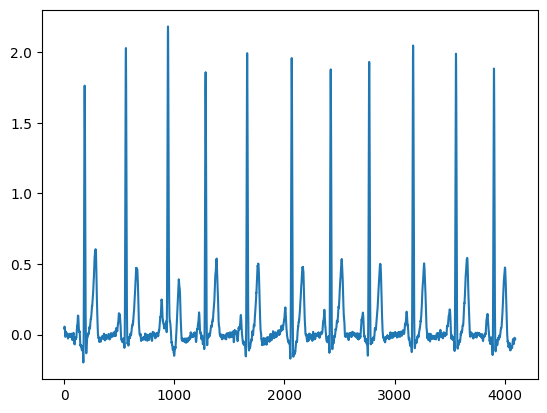

In [4]:
X = carregar_ecgs(normal=100,umdavb=0,rbbb=0,lbbb=0,sb=0,st=0,af=0,filtrado=True)

plt.plot(X[0][0])

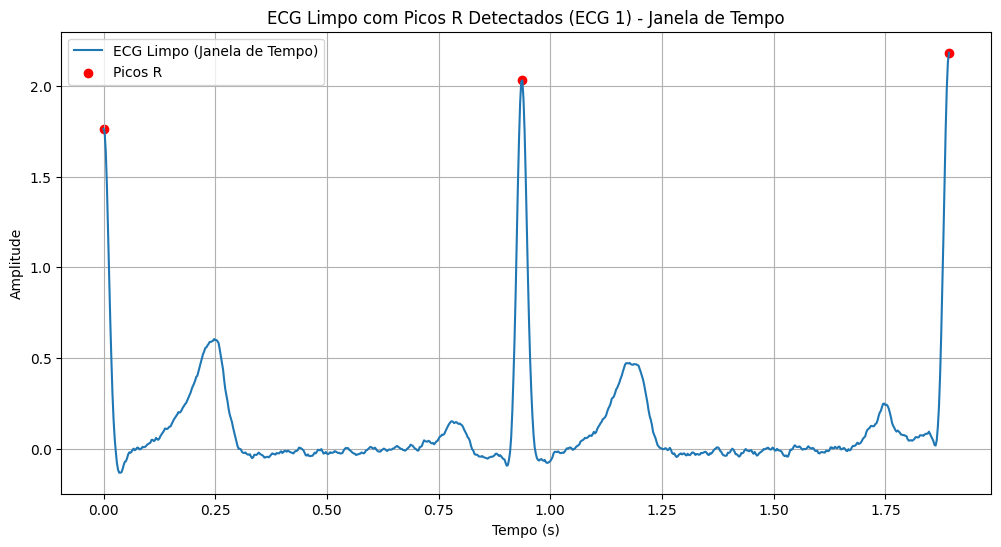

In [5]:
# Função para processar ECGs e armazenar R peaks
def processar_ecgs_multileads(ecgs):
    """
    Processa um vetor de ECGs com múltiplas derivações. Para cada ECG, limpa o sinal na primeira derivação,
    detecta os picos R e faz o corte sincronizado em todas as derivações.

    Parâmetros:
    ecgs: array 3D (n_ecgs x n_leads x n_samples) - Matriz contendo vários ECGs de múltiplas derivações

    Retorno:
    novo_ecgs: lista de arrays - Lista de ECGs processados
    r_peaks_list: lista de arrays - Lista contendo os índices dos R peaks relativos para cada ECG
    """
    n_ecgs, n_leads, n_samples = ecgs.shape
    novo_ecgs = []        # Lista para armazenar os novos ECGs processados
    r_peaks_list = []     # Lista para armazenar os R peaks de cada ECG
    picos_reais = []
    for i in range(n_ecgs):
        # Para cada ECG, obter as derivações
        ecg = ecgs[i]

        # Limpar o sinal da primeira derivação
        first_lead = ecg[0]
        sampling_rate = 400
        

        # Detectar picos R no sinal limpo
        peaks = nk.ecg_findpeaks(first_lead, sampling_rate=sampling_rate)

        # Extrair os índices dos picos R da primeira derivação
        r_peaks = peaks['ECG_R_Peaks']

        # Verificar se há picos suficientes
        if len(r_peaks) < 3:
            print(f"ECG {i + 1}: Não foram detectados picos R suficientes para processamento.")
            novo_ecgs.append(ecg)  # Adiciona o ECG original sem cortes
            r_peaks_list.append([])  # Adiciona uma lista vazia para R peaks
            continue

        # Calcular as distâncias entre os picos consecutivos
        distancias = np.diff(r_peaks)

        # Calcular a mediana das distâncias
        mediana = np.median(distancias)

        # Encontrar o índice do pico cuja distância está mais próxima da mediana
        indice_prox_mediana = np.argmin(np.abs(distancias - mediana))

        # Selecionar os três picos consecutivos
        if indice_prox_mediana + 3 > len(r_peaks):
            # Se não houver picos suficientes, seleciona os últimos três
            novo_ecg_peaks = r_peaks[-3:]
        else:
            novo_ecg_peaks = r_peaks[indice_prox_mediana:indice_prox_mediana + 3]

        # Garantir que temos pelo menos dois pontos para cortar
        if len(novo_ecg_peaks) < 2:
            print(f"ECG {i + 1}: Não foi possível selecionar picos R suficientes para corte.")
            novo_ecgs.append(ecg)  # Adiciona o ECG original sem cortes
            r_peaks_list.append([])  # Adiciona uma lista vazia para R peaks
            continue

        # Definir início e fim da janela
        start = novo_ecg_peaks[0]
        # Ajuste do fim para incluir o último pico sem exceder o número de amostras
        end = novo_ecg_peaks[-1] + 1 if (novo_ecg_peaks[-1] + 1) <= n_samples else novo_ecg_peaks[-1]

        # Criar um novo vetor de ECG para todas as derivações a partir desses picos
        novo_ecg_segmentado = ecg[:, start:end]

        # Substituir ou remover valores NaN
        novo_ecg_segmentado = np.nan_to_num(novo_ecg_segmentado, nan=0.0)

        # Ajustar os R peaks para a janela segmentada (índices relativos)
        r_peaks_window = novo_ecg_peaks - start
        # Garantir que os índices estão dentro dos limites
        r_peaks_window = r_peaks_window[r_peaks_window < (end - start)]

        # Adicionar o novo ECG processado à lista (com diferentes tamanhos)
        novo_ecgs.append(novo_ecg_segmentado)

        # Adicionar os R peaks relativos à lista
        r_peaks_list.append(r_peaks_window)
        
        picos_reais.append(novo_ecg_peaks)
        # Plotar o primeiro ECG como exemplo
        if i == 0:  # Plota apenas o primeiro ECG processado
            time_window = np.arange(end - start) / sampling_rate  # Tempo em segundos
            plt.figure(figsize=(12, 6))
            plt.plot(time_window, first_lead[start:end], label="ECG Limpo (Janela de Tempo)")
            # Ajustar os índices dos picos R para a janela
            plt.scatter(time_window[r_peaks_window], first_lead[novo_ecg_peaks], color='red', label="Picos R")
            plt.title(f"ECG Limpo com Picos R Detectados (ECG {i + 1}) - Janela de Tempo")
            plt.xlabel("Tempo (s)")
            plt.ylabel("Amplitude")
            plt.legend()
            plt.grid()
            plt.show()

    return novo_ecgs, r_peaks_list, picos_reais

# Processar os ECGs
novo_ecg, r_peaks_list, picos = processar_ecgs_multileads(X)

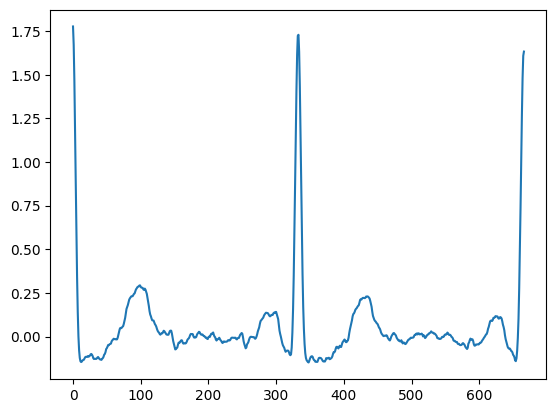

In [6]:
plt.plot(novo_ecg[14][0])
sinal = novo_ecg[14][0]

In [7]:
def moving_average(signal, window_size):
    return np.convolve(signal, np.ones(window_size)/window_size, mode='valid')

from scipy.signal import savgol_filter

def savitzky_golay_filter(signal, window_length, polyorder):
    return savgol_filter(signal, window_length=window_length, polyorder=polyorder)

from scipy.ndimage import gaussian_filter1d

def gaussian_smoothing(signal, sigma):
    return gaussian_filter1d(signal, sigma=sigma)

def exponential_moving_average(signal, alpha):
    ema = [signal[0]]  # Inicia com o primeiro valor
    for value in signal[1:]:
        ema.append(alpha * value + (1 - alpha) * ema[-1])
    return np.array(ema)


def fourier_denoising(signal, threshold):
    fft = np.fft.fft(signal)  # Transformada de Fourier do sinal
    frequencies = np.fft.fftfreq(len(signal))  # Frequências correspondentes
    
    # Mantém apenas as frequências abaixo do threshold
    fft[np.abs(frequencies) > threshold] = 0
    
    # Transformada inversa para reconstruir o sinal
    return np.real(np.fft.ifft(fft))

import pywt

def wavelet_denoising(signal, wavelet='db1', level=1):
    # Decomposição do sinal em coeficientes wavelet
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    
    # Calcula o threshold universal (assumindo ruído Gaussiano branco)
    sigma = np.median(np.abs(coeffs[-1])) / 0.6745  # Estimativa do sigma
    threshold = sigma * np.sqrt(2 * np.log(len(signal)))  # Ajuste este fator se necessário
        
    # Aplica o threshold (soft) apenas nos coeficientes de detalhe
    denoised_coeffs = [coeffs[0]] + [pywt.threshold(c, threshold, mode='soft') for c in coeffs[1:]]
    
    # Reconstrução do sinal
    return pywt.waverec(denoised_coeffs, wavelet)

from scipy.signal import medfilt

def median_filter(signal, kernel_size):
    return medfilt(signal, kernel_size=kernel_size)

import cv2
import numpy as np

def bilateral_filter(signal, diameter, sigma_color, sigma_space):
    return cv2.bilateralFilter(signal.astype(np.float32), diameter, sigma_color, sigma_space)





/home/grad/si/24/guilherme.evangelista/anaconda3/envs/condaclustering/lib/python3.12/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 60 is too high: all coefficients will experience boundary effects.
  warnings.warn(


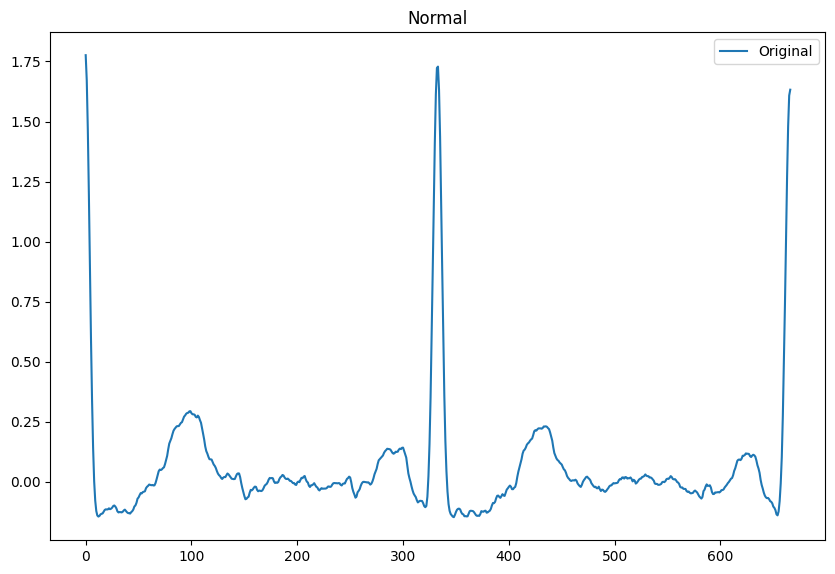

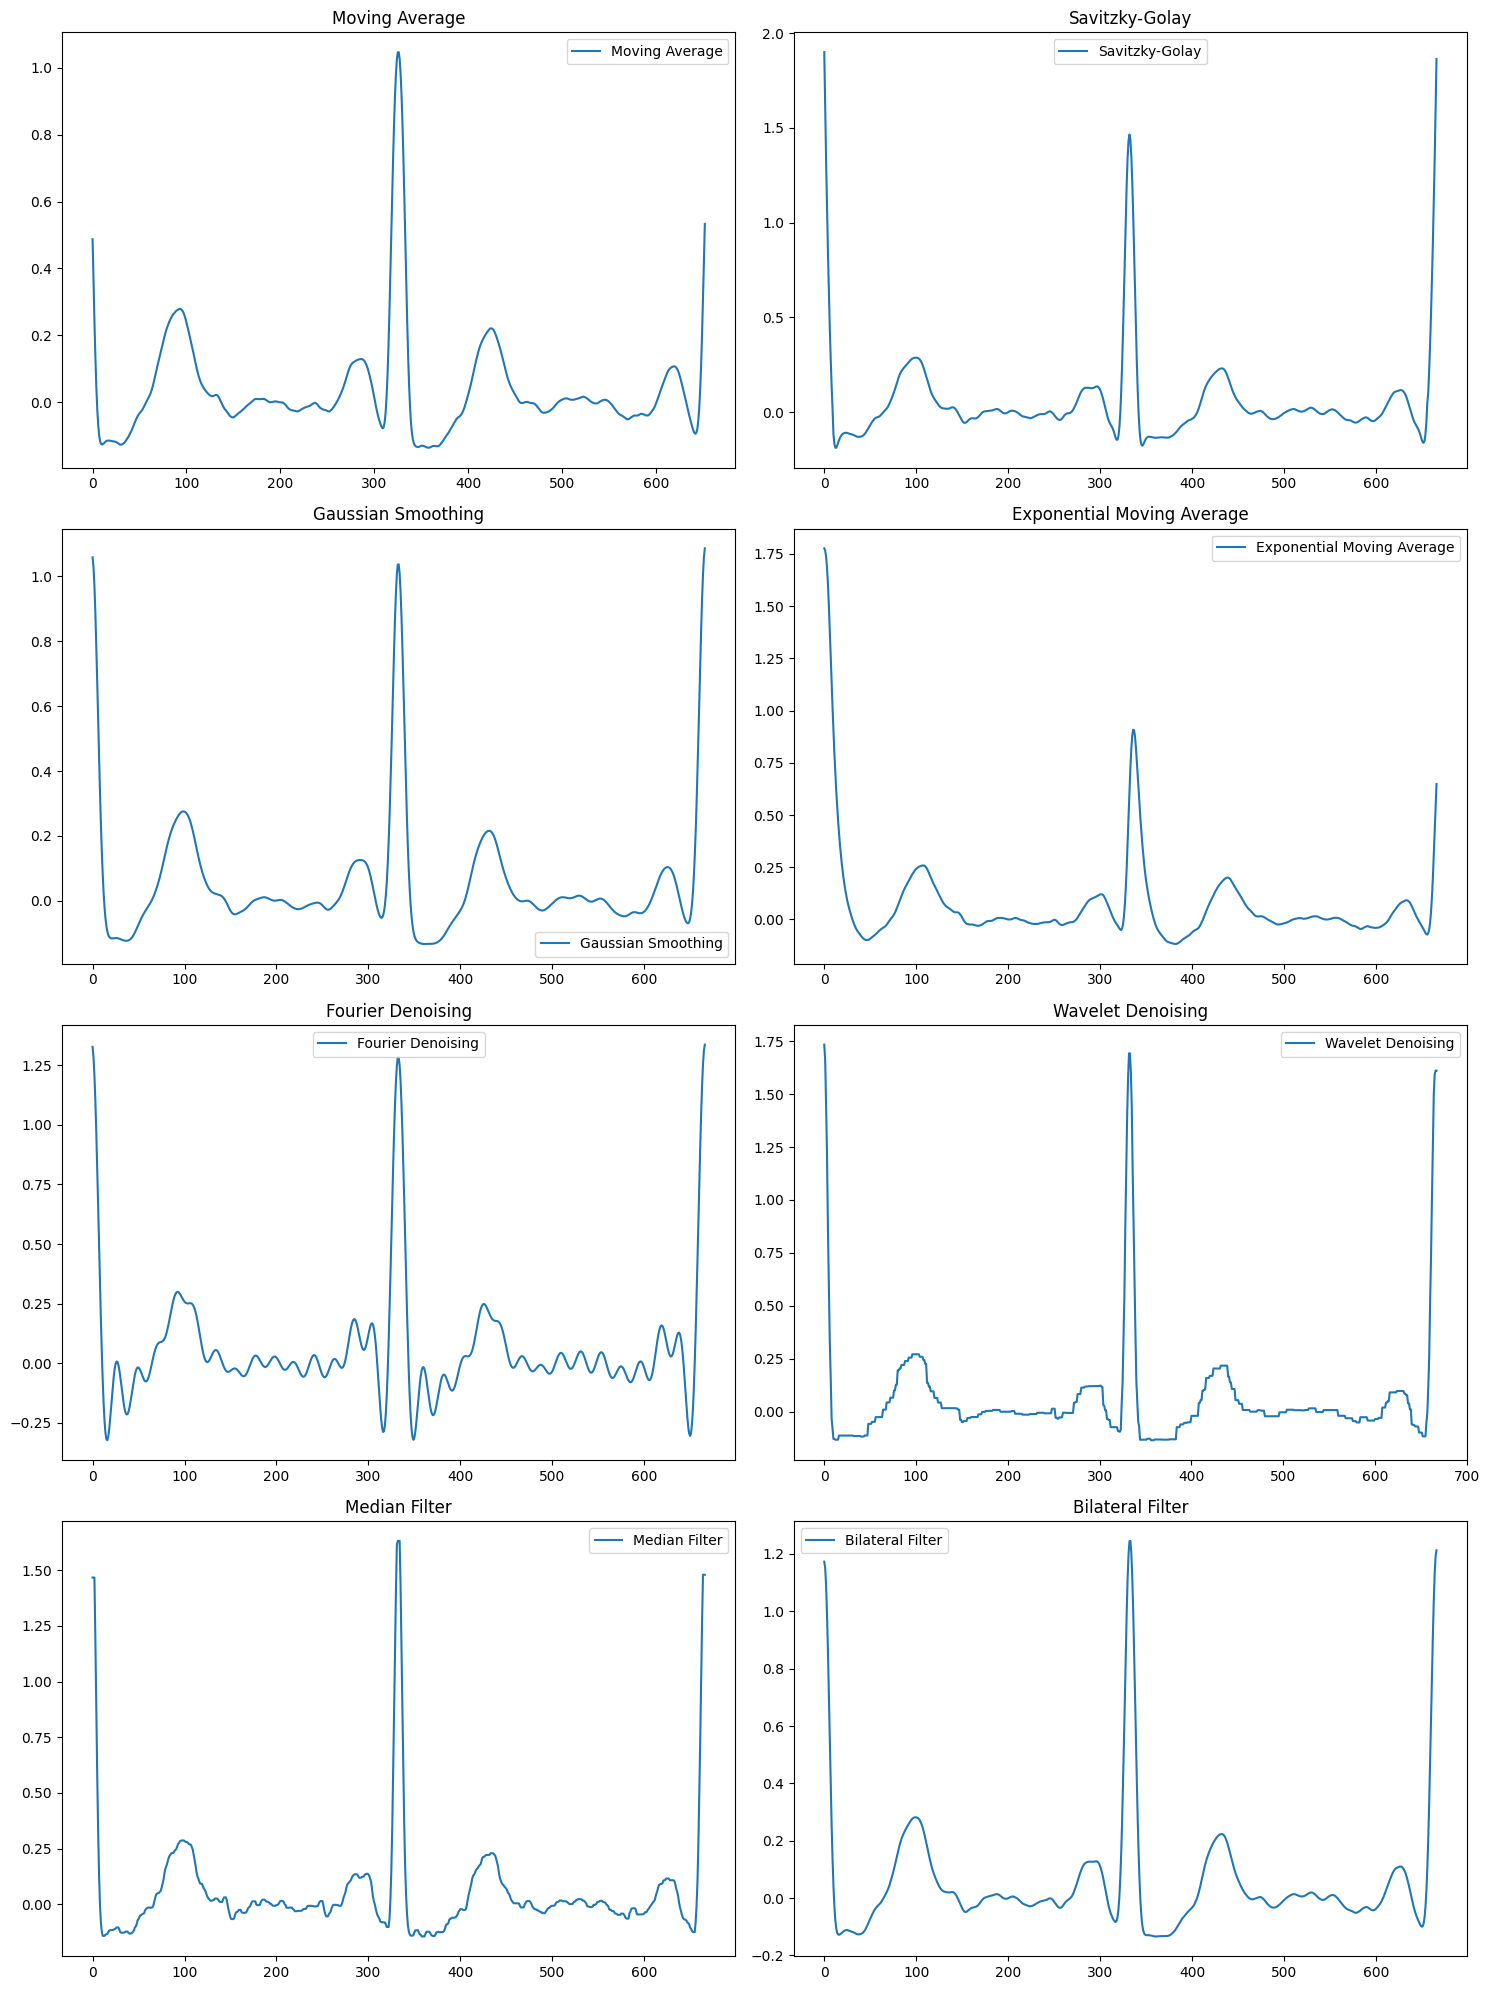

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Aplicando os filtros
window_size = 15  # Para Moving Average

window_size2 = 20  # Para Savitzky-Golay
polyorder = 2  # Para Savitzky-Golay

sigma = 5  # Para Gaussian Smoothing
alpha = 0.1  # Para Exponential Moving Average
fourier_threshold = 0.045  # Para Fourier Denoising
wavelet_level = 60  # Para Wavelet Denoising
kernel_size = 5  # Para Median Filter
diameter, sigma_color, sigma_space = 15, 75, 75  # Para Bilateral Filter

# Aplicação dos filtros
moving_avg_signal = moving_average(sinal, window_size)
savitzky_golay_signal = savitzky_golay_filter(sinal, window_size2, polyorder)
gaussian_signal = gaussian_smoothing(sinal, sigma)
exponential_signal = exponential_moving_average(sinal, alpha)
fourier_signal = fourier_denoising(sinal, fourier_threshold)
wavelet_signal = wavelet_denoising(sinal, level=wavelet_level)
median_signal = median_filter(sinal, kernel_size)
bilateral_signal = bilateral_filter(sinal, diameter, sigma_color, sigma_space)


plt.figure(figsize=(10, 6.6))
plt.plot( sinal, label='Original')
plt.title('Normal')
plt.legend()


# Plotando os sinais
plt.figure(figsize=(15, 20))
plt.subplot(4, 2, 1)
#plt.plot( sinal, label='Original')
plt.plot( moving_avg_signal, label='Moving Average')
plt.title('Moving Average')
plt.legend()

plt.subplot(4, 2, 2)
#plt.plot( sinal, label='Original')
plt.plot( savitzky_golay_signal, label='Savitzky-Golay')
plt.title('Savitzky-Golay')
plt.legend()

plt.subplot(4, 2, 3)
#plt.plot( sinal, label='Original')
plt.plot( gaussian_signal, label='Gaussian Smoothing')
plt.title('Gaussian Smoothing')
plt.legend()

plt.subplot(4, 2, 4)
#plt.plot( sinal, label='Original')
plt.plot( exponential_signal, label='Exponential Moving Average')
plt.title('Exponential Moving Average')
plt.legend()

plt.subplot(4, 2, 5)
#plt.plot( sinal, label='Original')
plt.plot( fourier_signal, label='Fourier Denoising')
plt.title('Fourier Denoising')
plt.legend()

plt.subplot(4, 2, 6)
#plt.plot( sinal, label='Original')
plt.plot( wavelet_signal, label='Wavelet Denoising')
plt.title('Wavelet Denoising')
plt.legend()

plt.subplot(4, 2, 7)
#plt.plot( sinal, label='Original')
plt.plot( median_signal, label='Median Filter')
plt.title('Median Filter')
plt.legend()

plt.subplot(4, 2, 8)
#plt.plot( sinal, label='Original')
plt.plot( bilateral_signal, label='Bilateral Filter')
plt.title('Bilateral Filter')
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
# Função para inverter ECGs e ajustar os R peaks
def inverter_ecg_e_rpeaks(novo_ecgs, r_peaks_list):
    """
    Inverte os sinais de ECG e os R peaks correspondentes.

    Parâmetros:
    novo_ecgs: lista de arrays - Lista de ECGs processados
    r_peaks_list: lista de arrays - Lista contendo os índices dos R peaks relativos para cada ECG

    Retorno:
    invertido_ecgs: lista de arrays - Lista de ECGs invertidos
    invertido_r_peaks_list: lista de arrays - Lista contendo os índices dos R peaks para cada ECG
    """
    invertido_ecgs = []
    invertido_r_peaks_list = []

    for ecg, r_peaks in zip(novo_ecgs, r_peaks_list):
        # Inverter o sinal do ECG
        gaussian_signal = savitzky_golay_filter(ecg, window_size2, polyorder)

        ecg_invertido = -gaussian_signal
        invertido_ecgs.append(ecg_invertido)

        # Os R peaks permanecem nas mesmas posições relativas
        invertido_r_peaks_list.append(r_peaks)

    return invertido_ecgs, invertido_r_peaks_list


In [10]:
# Função para plotar ECG invertido com R peaks
def plotar_ecg_invertido_com_rpeaks(ecg_invertido, r_peaks_invertidos, sampling_rate=400, ecg_index=0):
    """
    Plota um ECG invertido com os R peaks invertidos.

    Parâmetros:
    ecg_invertido: array 2D - ECG invertido (leads x amostras)
    r_peaks_invertidos: array 1D - Índices dos R peaks relativos para o ECG invertido
    sampling_rate: int - Taxa de amostragem do ECG
    ecg_index: int - Índice do ECG para plotar
    """
    # Seleciona a primeira derivação para plotagem
    first_lead_invertido = ecg_invertido[0]

    # Cria o vetor de tempo
    n_samples = first_lead_invertido.shape[0]
    time = np.arange(n_samples) / sampling_rate  # Tempo em segundos

    # Verificar se há R peaks para plotar
    if len(r_peaks_invertidos) == 0:
        print(f"ECG {ecg_index + 1}: Nenhum R peak para plotar.")
        r_peaks_amplitudes = []
    else:
        # Garantir que os índices dos R peaks estão dentro dos limites
        r_peaks_invertidos = r_peaks_invertidos[r_peaks_invertidos < n_samples]
        r_peaks_amplitudes = first_lead_invertido[r_peaks_invertidos]

    plt.figure(figsize=(12, 6))
    plt.plot(time, first_lead_invertido, label="ECG Invertido")
    
    if len(r_peaks_invertidos) > 0:
        plt.scatter(time[r_peaks_invertidos], r_peaks_amplitudes, color='blue', label="R Peaks Invertidos")
    
    plt.title(f"ECG Invertido com R Peaks Invertidos (ECG {ecg_index + 1})")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid()
    plt.show()


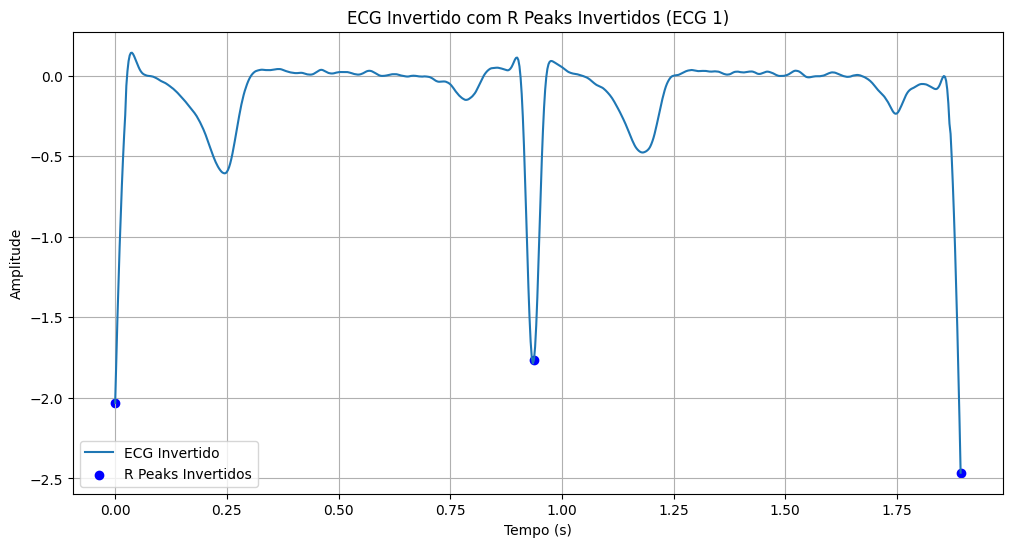

In [11]:
# Inverter os ECGs e os R peaks
invertido_ecgs, invertido_r_peaks_list = inverter_ecg_e_rpeaks(novo_ecg, r_peaks_list)

# Exemplo: Plotar o primeiro ECG invertido com seus R peaks invertidos
if len(invertido_ecgs) > 0 and len(invertido_r_peaks_list) > 0:
    ecg_index = 0  # Índice do ECG a ser plotado
    plotar_ecg_invertido_com_rpeaks(
        invertido_ecgs[ecg_index],
        invertido_r_peaks_list[ecg_index],
        sampling_rate=400,
        ecg_index=ecg_index
    )
else:
    print("Nenhum ECG invertido disponível para plotagem.")


In [12]:
def aplicar_filtro(novo_ecgs, r_peaks_list):
    filtrado_ecgs = []
    filtrado_r_peaks_list = []

    for ecg, r_peaks in zip(novo_ecgs, r_peaks_list):
        # Aplicar o filtro Savitzky-Golay no ECG
        filtrado_ecg = savitzky_golay_filter(ecg, window_size2, polyorder)
        filtrado_ecgs.append(filtrado_ecg)

        # Os R peaks permanecem nas mesmas posições relativas
        filtrado_r_peaks_list.append(r_peaks)

    return filtrado_ecgs, filtrado_r_peaks_list

# Aplicar o filtro nos ECGs e manter os R peaks
novo_ecg, r_peak_list = aplicar_filtro(novo_ecg, r_peaks_list)

Processando e plotando 20 ECGs.

--- Processando ECG 1 ---
Picos R invertido: [  0 375 757]
Picos R normal: [  0 375 757]
Picos R ordenados: [0, 375, 757]
Excluindo de 0 até 60 (R1 + 150ms)
Excluindo de 391 até o fim do ECG (R2 + 40ms)
Total de índices ignorados: 427
Pontos selecionados por amplitude: [374, 375, 373, 376, 372, 377, 371, 378, 370, 379, 369, 380, 368, 381, 367, 98, 97, 99, 96, 100, 95, 94, 101, 93, 102, 92, 91, 103, 90, 382, 89, 104, 88, 87, 105, 86, 106, 85, 366, 84, 107, 83, 82, 108, 81, 80, 383, 79, 109, 78, 77, 110, 76, 75, 74, 365, 73, 111, 72, 71, 70, 69, 112, 68, 384, 67, 66, 65, 113, 64, 63, 62, 314, 315, 313, 114, 316, 61, 312, 317, 311, 60, 318, 310, 319, 309, 320, 308, 115, 321, 307, 364, 322, 306, 323, 305, 116, 304, 385, 324, 303, 117, 325, 302, 301, 326, 118, 300, 299, 298, 327, 297, 290, 296, 291, 289, 292, 119, 295, 294, 293, 288, 287, 328, 286, 285, 120, 284, 329, 283, 363, 282, 386, 121, 281, 280, 275, 279, 262, 274, 261, 276, 273, 278, 263, 272, 277, 2

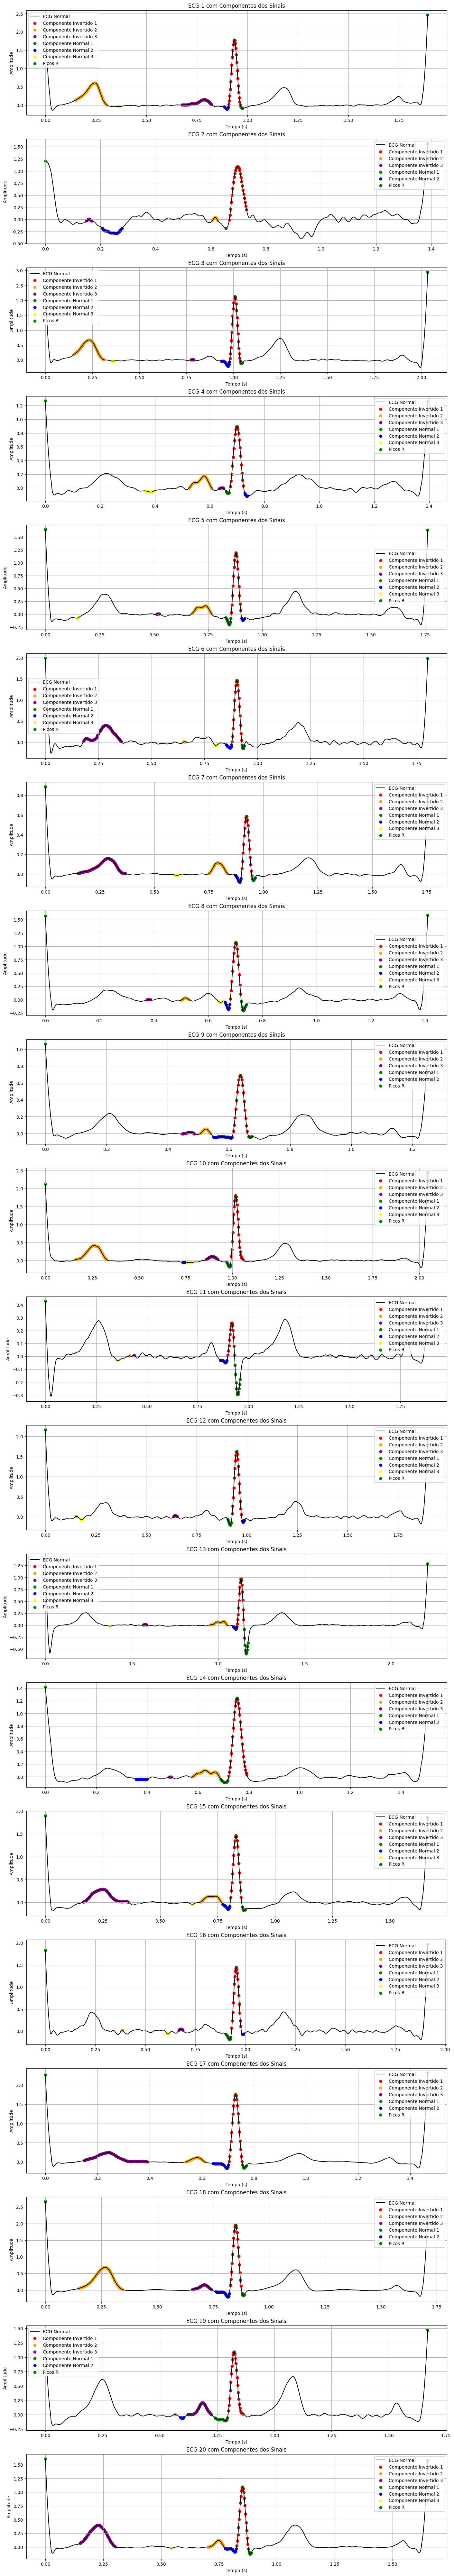

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pyunicorn.timeseries import VisibilityGraph
import networkx as nx  # Para identificar componentes conectados

# --- Parâmetros Globais ---
SAMPLING_RATE = 400  # Hz
TOP_N_POINTS = 150
EXCL_FIRST_MS = 150  # ms
EXCL_SECOND_MS = 40   # ms
N_ECGS_TO_PLOT = 20    # Número de ECGs a serem plotados
WINDOW_SIZE_SEC = 5    # Tamanho da janela em segundos
MIN_NODES_PER_WINDOW = 30
MIN_DISTANCE = 1       # Mínima distância entre nós (em amostras)

# --- Funções ---
def segmentar_ecg(ecg, picos_r, sampling_rate, top_n, excl_first_ms, excl_second_ms):
    ignorar = np.zeros(len(ecg), dtype=bool)
    excl_first = int(excl_first_ms * sampling_rate / 1000)
    excl_second = int(excl_second_ms * sampling_rate / 1000)
    
    picos_r = sorted(picos_r)
    print(f"Picos R ordenados: {picos_r}")
    
    # Excluir após o primeiro pico R
    if len(picos_r) > 0:
        r1 = picos_r[0]
        end1 = min(r1 + excl_first, len(ecg))
        ignorar[r1:end1] = True
        print(f"Excluindo de {r1} até {end1} (R1 + {excl_first_ms}ms)")
    
    # Excluir do segundo pico R +40ms até o fim
    if len(picos_r) > 1:
        r2 = picos_r[1]
        start2 = r2 + excl_second
        if start2 < len(ecg):
            ignorar[start2:] = True
            print(f"Excluindo de {start2} até o fim do ECG (R2 + {excl_second_ms}ms)")
    
    # Debug: Mostrar os índices ignorados
    ignorados = np.where(ignorar)[0]
    print(f"Total de índices ignorados: {len(ignorados)}")
    
    # Selecionar top_n pontos de menor amplitude excluindo ignorados
    indices_amplitudes = np.argsort(ecg)  # Ordena por amplitude (mais negativo primeiro)
    selecionados = [idx for idx in indices_amplitudes if not ignorar[idx]][:top_n]
    print(f"Pontos selecionados por amplitude: {selecionados}")
    
    return selecionados

def filtrar_pontos_por_vizinhos(pontos, window_size, min_nodes, min_distance):
    """
    Filtra os pontos selecionados, criando uma janela ao redor de cada ponto,
    e seleciona pontos com base no número de vizinhos dentro da janela.

    Args:
        pontos (list): Lista de índices dos pontos selecionados.
        window_size (int): Tamanho da janela (em amostras).
        min_nodes (int): Número mínimo de pontos necessários na janela.
        min_distance (int): Distância mínima entre pontos selecionados.

    Returns:
        list: Lista de pontos filtrados.
    """
    pontos = sorted(pontos)  # Certificar que estão ordenados
    pontos_filtrados = []
    
    for ponto in pontos:
        # Criar janela ao redor do ponto
        janela_start = ponto - window_size // 2
        janela_end = ponto + window_size // 2
        
        # Encontrar vizinhos dentro da janela
        vizinhos = [p for p in pontos if janela_start <= p <= janela_end]
        
        if len(vizinhos) >= min_nodes:
            # Garantir distância mínima entre pontos
            ultimo_selecionado = -min_distance
            for v in vizinhos:
                if v - ultimo_selecionado >= min_distance:
                    pontos_filtrados.append(v)
                    ultimo_selecionado = v
    
    # Remover duplicatas e retornar os pontos filtrados
    return sorted(list(set(pontos_filtrados)))

def encontrar_componentes_conectados(ecg, pontos_selecionados, visibility_relations, n_components=4):
    # Construir grafo
    G = nx.Graph()
    G.add_nodes_from(pontos_selecionados)
    
    # Adicionar arestas baseadas nas relações de visibilidade
    pontos_array = np.array(pontos_selecionados)
    for i, idx in enumerate(pontos_array):
        visiveis_relativos = np.where(visibility_relations[idx, pontos_array])[0]
        # Mapear índices relativos para absolutos
        visiveis_absolutos = pontos_array[visiveis_relativos]
        for j in visiveis_absolutos:
            if j != idx:
                G.add_edge(idx, j)
    
    # Encontrar componentes conectados
    componentes = list(nx.connected_components(G))
    # Ordenar componentes por tamanho (maiores primeiro)
    componentes_sorted = sorted(componentes, key=lambda x: len(x), reverse=True)
    # Selecionar os top_n_components
    principais_componentes = componentes_sorted[:n_components]
    
    # Converter conjuntos para listas ordenadas
    principais_componentes = [sorted(list(c)) for c in principais_componentes]
    
    return principais_componentes

def calcular_derivadas_com_filtro(ecg, componentes, min_size=5, min_amplitude=0.05):
    """
    Calcula a 1ª e 2ª derivadas para cada componente do ECG, com filtros por tamanho e amplitude.

    Args:
        ecg (np.array): Sinal de ECG.
        componentes (list): Lista de componentes conectados (listas de índices).
        min_size (int): Tamanho mínimo do componente para ser considerado.
        min_amplitude (float): Amplitude mínima média para considerar um componente.

    Returns:
        list: Lista de tuplas (componente, derivada1_média, derivada2_média).
    """
    primeira_derivada = np.gradient(ecg)
    segunda_derivada = np.gradient(primeira_derivada)
    resultados = []

    for componente in componentes:
        if len(componente) < min_size:  # Filtro de tamanho
            continue
        amplitude_media = np.mean(np.abs(ecg[componente]))
        if amplitude_media < min_amplitude:  # Filtro de amplitude
            continue
        derivada1_media = np.mean(np.abs(primeira_derivada[componente]))
        derivada2_media = np.mean(np.abs(segunda_derivada[componente]))
        resultados.append((componente, derivada1_media, derivada2_media, amplitude_media))

    return resultados

def processar_e_plotar_ecgs_combinado(invertido_ecgs, invertido_r_peaks_list, novo_ecgs, r_peaks_list):
    n_ecgs = min(N_ECGS_TO_PLOT, len(novo_ecgs), len(r_peaks_list), len(invertido_ecgs), len(invertido_r_peaks_list))
    print(f"Processando e plotando {n_ecgs} ECGs.")
    
    fig, axs = plt.subplots(n_ecgs, 1, figsize=(14, 4 * n_ecgs), constrained_layout=True)
    if n_ecgs == 1:
        axs = [axs]
    
    for i in range(n_ecgs):
        # ECG invertido
        ecg_invertido = invertido_ecgs[i][0]
        t_invertido = np.arange(len(ecg_invertido)) / SAMPLING_RATE
        picos_r_invertido = invertido_r_peaks_list[i]
        
        # ECG normal
        ecg_normal = novo_ecgs[i][0]
        t_normal = np.arange(len(ecg_normal)) / SAMPLING_RATE
        picos_r_normal = r_peaks_list[i]
        
        print(f"\n--- Processando ECG {i + 1} ---")
        print(f"Picos R invertido: {picos_r_invertido}")
        print(f"Picos R normal: {picos_r_normal}")
        
        # Segmentação inicial (invertido)
        pontos_selecionados_invertido = segmentar_ecg(
            ecg_invertido, picos_r_invertido, SAMPLING_RATE, TOP_N_POINTS, EXCL_FIRST_MS, EXCL_SECOND_MS
        )
        
        # Segmentação inicial (normal) com TOP_N_POINTS ajustado para 30
        pontos_selecionados_normal = segmentar_ecg(
            ecg_normal, picos_r_normal, SAMPLING_RATE, 30, EXCL_FIRST_MS, EXCL_SECOND_MS
        )
        
        # Aplicar filtragem baseada em janelas centradas nos pontos
        window_size = WINDOW_SIZE_SEC * SAMPLING_RATE
        pontos_filtrados_invertido = filtrar_pontos_por_vizinhos(
            pontos=pontos_selecionados_invertido, 
            window_size=window_size, 
            min_nodes=MIN_NODES_PER_WINDOW, 
            min_distance=MIN_DISTANCE
        )
        
        pontos_filtrados_normal = filtrar_pontos_por_vizinhos(
            pontos=pontos_selecionados_normal, 
            window_size=window_size, 
            min_nodes=MIN_NODES_PER_WINDOW, 
            min_distance=MIN_DISTANCE
        )
        
        print(f"Pontos filtrados invertido: {pontos_filtrados_invertido}")
        print(f"Pontos filtrados normal: {pontos_filtrados_normal}")
        
        # Construir grafos de visibilidade para os pontos filtrados
        VG_invertido = VisibilityGraph(ecg_invertido, horizontal=False)
        vis_relations_invertido = VG_invertido.visibility_relations()
        
        VG_normal = VisibilityGraph(ecg_normal, horizontal=False)
        vis_relations_normal = VG_normal.visibility_relations()
        
        # Encontrar componentes conectados
        componentes_invertido = encontrar_componentes_conectados(
            ecg_invertido, pontos_filtrados_invertido, vis_relations_invertido, n_components=20
        )
        
        componentes_normal = encontrar_componentes_conectados(
            ecg_normal, pontos_filtrados_normal, vis_relations_normal, n_components=20
        )
        
        print(f"Componentes conectados (invertido): {componentes_invertido}")
        print(f"Componentes conectados (normal): {componentes_normal}")
        
        # Calcular derivadas e aplicar filtros nos componentes conectados
        derivadas_invertido = calcular_derivadas_com_filtro(ecg_invertido, componentes_invertido, min_size=10, min_amplitude=0.1)
        derivadas_normal = calcular_derivadas_com_filtro(ecg_normal, componentes_normal, min_size=10, min_amplitude=0.1)

        # Ordenar e selecionar os top 3 por maior 2ª derivada
        top_componentes_invertido = [comp for comp, _, _, _ in sorted(derivadas_invertido, key=lambda x: x[2], reverse=True)[:3]]
        top_componentes_normal = [comp for comp, _, _, _ in sorted(derivadas_normal, key=lambda x: x[2], reverse=True)[:3]]
        
        # Plotar os sinais normais com os componentes de ambos os casos
        ax = axs[i]
        ax.plot(t_normal, ecg_normal, label="ECG Normal", color="black")
        colors = ['red', 'orange', 'purple', 'green', 'blue', 'yellow', 'pink', 'brown', 'gray']
        
        # Componentes dos sinais invertidos (top 3 por 2ª derivada)
        for j, componente in enumerate(top_componentes_invertido):
            if len(componente) == 0:
                continue
            ax.scatter(t_normal[componente], ecg_normal[componente], 
                       color=colors[j % len(colors)], 
                       label=f"Componente Invertido {j+1}")
        
        # Componentes dos sinais normais (top 3 por 2ª derivada)
        for j, componente in enumerate(top_componentes_normal):
            if len(componente) == 0:
                continue
            ax.scatter(t_normal[componente], ecg_normal[componente], 
                       color=colors[(j + len(top_componentes_invertido)) % len(colors)], 
                       label=f"Componente Normal {j+1}")
        
        # Picos R normais
        ax.scatter(t_normal[picos_r_normal], ecg_normal[picos_r_normal], color="green", label="Picos R")
        ax.set_xlabel("Tempo (s)")
        ax.set_ylabel("Amplitude")
        ax.set_title(f"ECG {i+1} com Componentes dos Sinais")
        ax.legend()
        ax.grid(True)
    
    plt.show()

# Chamando a função combinada
processar_e_plotar_ecgs_combinado(
    invertido_ecgs=invertido_ecgs, 
    invertido_r_peaks_list=invertido_r_peaks_list, 
    novo_ecgs=novo_ecg, 
    r_peaks_list=r_peak_list
)
